#### Prerequisites

In [1]:
%%capture

!pip install gensim==4.0.1
!pip install python-Levenshtein
!pip install stop-words

#### Imports 

In [2]:
from IPython.display import Image, display
from shutil import copyfile
import pandas as pd
import numpy as np
import operator
import logging
import gensim 
import os

#### Setup logger

In [3]:
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)
logger.addHandler(logging.StreamHandler())

In [4]:
logger.info('Using torch: {torch.__version__}')

Using torch: {torch.__version__}


#### Essentials

In [5]:
DATASET_ROOT = './data/'
IMAGE_EMBEDDINGS_PATH = f'{DATASET_ROOT}/embeddings/image_embeddings.csv'
CAPTION_EMBEDDINGS_PATH = f'{DATASET_ROOT}/embeddings/caption_embeddings.csv'
WORD2VEC_MODEL_PATH = f'{DATASET_ROOT}/models/word2vec.model'

EMBEDDING_DIMENSIONALITY = 1000  
TOP_K = 3

#### Load word2Vec model

In [6]:
word2vec_model = gensim.models.Word2Vec.load(WORD2VEC_MODEL_PATH)

#### Load image embeddings 

In [7]:
image_embeddings = {}


df = pd.read_csv(IMAGE_EMBEDDINGS_PATH, sep='\t')
for _, row in df.iterrows():
    image_id, embedding = row
    embedding = eval(embedding)
    image_embeddings[image_id] = np.array(embedding)

Normalize the image embeddings

In [8]:
for image_id in image_embeddings:
    image_embeddings[image_id] = image_embeddings[image_id]/sum(image_embeddings[image_id])

 Encode search query

In [22]:
query = 'bridge'

In [23]:
query_embedding = word2vec_model.wv[query]
if min(query_embedding) < 0:
    query_embedding = query_embedding - min(query_embedding)
if max(query_embedding) > 0:
    query_embedding = query_embedding / max(query_embedding)
    

Compute distances between query embedding and image embeddings

In [24]:
similarities = {}
for image_id, image_embedding in image_embeddings.items():
    similarities[image_id] = np.dot(image_embedding, query_embedding)

In [25]:
similarities = sorted(similarities.items(), key=operator.itemgetter(1), reverse=True)

Rank = 1 | Score = 0.3958955830762654


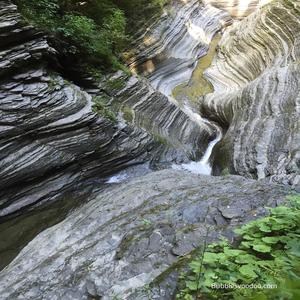

Rank = 2 | Score = 0.39554449313198203


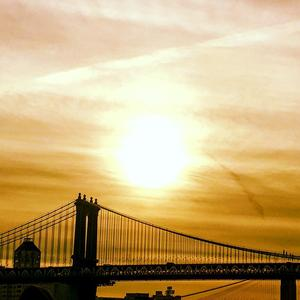

Rank = 3 | Score = 0.3953350904218735


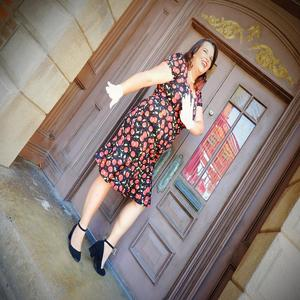

In [26]:
i = 0
for image_id, score in similarities[: TOP_K]:
    i += 1
    logger.info(f'Rank = {i} | Score = {score}')
    display(Image(filename=f'{DATASET_ROOT}/images/{image_id}.jpg'))